# Income Tax in the US

Income tax data is collected for different states in the US. It consists of several excel sheets: raw data of total income taxes collected, consumption rate per state, locations and tax codes.
The dataset is poorly structured and in need of tidying up to improve its quality. 

Initial dataset is saved here: https://docs.google.com/spreadsheets/d/1JEhog1MXnOWxJGjfDhJ0BcpvE4bxUxF0cik08UR4EqI/edit?usp=sharing 

**Questions to answer during the research:**

1. Determine state which has the highest amount of taxes per person.
2. Determine state with the third largest amount of collected taxes.
3. Name region with the smallest value of sum of "Individual Income Taxes" and "Income Taxes"
4. Calculate percent changes of personal consumption expenditures between 2018 and 2020 for each state and determine state and year with highest change (example: Florida 2018/2019)
5. Determine Region with the highest average Personal Consumption Expenditures per person in 2020
6. Prepare a dashboard(s) in one of data visualization to present:
1) Amount of taxes collected per person in each state.
2) Amount of taxes collected in each state.
3) Breakdown of collected taxes (tax types).
4) How value of personal consumption expenditures has changed in time.
5) Ranking of regions based on average value of personal consumption expenditures per person.

### **Research design:**
- Data reading, overview, data quality check.
- Cleaning the data, improving the data quality, creating a final dataset for further analysis.
- Data analysis, searching for insights in data, answering research questions.
- Making general conclusions and suggestions for further research.

## 1.	Data reading & overview

### 1.1 Open the file, read all existing sheets with data and get a general infomation about the dataset.

- ___raw_data___ column

In [61]:
import pandas as pd
    
raw_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx',sheet_name = 'raw_data')
raw_data = raw_data.iloc[3:,]
raw_data.reset_index()
raw_data = raw_data.rename(columns={'State/Region': 'state', 'Population': 'population', 'Tax Name': 'tax_name'})
raw_data

,state,State Code,tax_name,Tax Code,Taxes Collected,population
3,United States,0.0,Property Taxes,T01,19030677,NaN
4,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN
5,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN
6,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN
7,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN
...,...,...,...,...,...,...
1730,Washington,48.0,Death and Gift Taxes,T50,167972,NaN
1731,Washington,48.0,Documentarty and Stock Transfer Taxes,T51,1072649,NaN
1732,Washington,48.0,Severance Taxes,T53,35055,NaN
1733,Washington,48.0,"Taxes, NEC",T99,0,NaN


**Check the column _'tax_name'_ with categorical variable.**

In [62]:
raw_data['tax_name'].unique() # call for unique values

array(['Property Taxes', 'Sales and Gross Receipts Taxes',
       'General Sales and Gross Receipts Taxes',
       'Selective Sales   and Gross Receipts    Taxes',
       'Alcoholic Beverages Sales Tax', 'Amusements Sales Tax',
       'Insurance Premiums Sales Tax', 'Motor Fuels Sales Tax',
       'Pari-mutuels Sales Tax', 'Public   Utilities   Sales   Tax',
       'Tobacco   Products   Sales   Tax',
       'Other   Selective   Sales   and   Gross   Receipts   Taxes',
       'License   Taxes', 'Alcoholic   Beverages   License',
       'Amusements License', 'Corporations in General License',
       'Hunting and Fishing License', 'Motor Vehicle License',
       'Motor Vehicle Operators License', 'Public Utilities License',
       'Occupation and Business License, NEC', 'Other//License//Taxes',
       'Income//Taxes', 'Individual//Income//Taxes',
       'Corporations//Net//Income//Taxes', 'Other//Taxes',
       'Death//and//Gift//Taxes',
       'Documentarty//and//Stock//Transfer//Taxes',

From the output above we conclude that the column _'tax_name'_ should be cleaned up.

In [63]:
raw_data.dtypes

state               object
State Code         float64
tax_name            object
Tax Code            object
Taxes Collected     object
population          object
dtype: object

In [64]:
raw_data['tax_name'] = raw_data['tax_name'].astype(str)

In [65]:
import re
compiler = re.compile(r'([A-Z]+[a-z]+)|([a-z]+)|(NEC)+')

def tax_name(tax:str):
    norm = ''
    groups = compiler.findall(tax)
    for gr in groups:
        for s in gr:
            if s != '':
                norm+=s + ' '
    norm = norm.strip()
    return norm
raw_data['tax_name'] =  raw_data['tax_name'].apply(tax_name)

In [66]:
raw_data['tax_name'].unique()

array(['Property Taxes', 'Sales and Gross Receipts Taxes',
       'General Sales and Gross Receipts Taxes',
       'Selective Sales and Gross Receipts Taxes',
       'Alcoholic Beverages Sales Tax', 'Amusements Sales Tax',
       'Insurance Premiums Sales Tax', 'Motor Fuels Sales Tax',
       'Pari mutuels Sales Tax', 'Public Utilities Sales Tax',
       'Tobacco Products Sales Tax',
       'Other Selective Sales and Gross Receipts Taxes', 'License Taxes',
       'Alcoholic Beverages License', 'Amusements License',
       'Corporations in General License', 'Hunting and Fishing License',
       'Motor Vehicle License', 'Motor Vehicle Operators License',
       'Public Utilities License', 'Occupation and Business License NEC',
       'Other License Taxes', 'Income Taxes', 'Individual Income Taxes',
       'Corporations Net Income Taxes', 'Other Taxes',
       'Death and Gift Taxes', 'Documentarty and Stock Transfer Taxes',
       'Severance Taxes', 'Taxes NEC', 'nan', 'Total Taxes',
    

**Done!** The column _'tax_name'_ is now clean.

- ___consumption_data___

Read the sheet _'consumption_data'_ with a correct labeling:

In [67]:
consumption_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx', sheet_name = 'consumption_data')
consumption_data = consumption_data.iloc[2:5, 1:]

In [68]:
consumption_data.columns

Index(['Total Personal Consumption Expenditures, by State, 2018–2020',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54'],
      dtype='object')

Rename the columns accordingly:

Year/State	
United States total	
Connecticut	
Maine	
Massachusetts	
New Hampshire	
Rhode Island	
Vermont	
Delaware	
District of Columbia	
Maryland	
New Jersey	
New York	
Pennsylvania	
Illinois	
Indiana	
Michigan	
Ohio	
Wisconsin	
Iowa	
Kansas	
Minnesota	
Missouri	
Nebraska	
North Dakota	
South Dakota	
Alabama	
Arkansas	
Florida	
Georgia	
Kentucky	
Louisiana	
Mississippi	
North Carolina	
South Carolina	
Tennessee	
Virginia	
West Virginia	
Arizona	
New Mexico	
Oklahoma	
Texas	
Colorado	
Idaho	
Montana	
Utah	
Wyoming	
Alaska	
California	
Hawaii	
Nevada	
Oregon	
Washington	
Net expenditures abroad by U.S. residenta1

In [69]:
consumption_data = consumption_data.rename(columns={
'Total Personal Consumption Expenditures, by State, 2018–2020': 'year',
       'Unnamed: 2' : 'United States total', 
    'Unnamed: 3': 'Connecticut', 
    'Unnamed: 4': 'Maine', 
    'Unnamed: 5': 'Massachusetts', 
    'Unnamed: 6': 'New Hampshire',
       'Unnamed: 7': 'Rhode Island', 
    'Unnamed: 8': 'Vermont', 
    'Unnamed: 9': 'Delaware', 
    'Unnamed: 10': 'District of Columbia', 
    'Unnamed: 11': 'Maryland',
       'Unnamed: 12': 'New Jersey', 
    'Unnamed: 13': 'New York', 
    'Unnamed: 14': 'Pennsylvania', 
    'Unnamed: 15': 'Illinois',
       'Unnamed: 16': 'Indiana', 
    'Unnamed: 17': 'Michigan', 
    'Unnamed: 18': 'Ohio', 
    'Unnamed: 19': 'Wisconsin',
       'Unnamed: 20': 'Iowa', 
    'Unnamed: 21': 'Kansas', 
    'Unnamed: 22': 'Minnesota', 
    'Unnamed: 23': 'Missouri',
       'Unnamed: 24': 'Nebraska', 
    'Unnamed: 25': 'North Dakota', 
    'Unnamed: 26': 'South Dakota', 
    'Unnamed: 27': 'Alabama',
       'Unnamed: 28': 'Arkansas', 
    'Unnamed: 29': 'Florida', 
    'Unnamed: 30': 'Georgia', 
    'Unnamed: 31': 'Kentucky',
       'Unnamed: 32': 'Louisiana', 
    'Unnamed: 33': 'Mississippi', 
    'Unnamed: 34': 'North Carolina', 
    'Unnamed: 35': 'South Carolina',
       'Unnamed: 36': 'Tennessee', 
    'Unnamed: 37': 'Virginia', 
    'Unnamed: 38': 'West Virginia', 
    'Unnamed: 39': 'Arizona',
       'Unnamed: 40': 'New Mexico', 
    'Unnamed: 41': 'Oklahoma', 
    'Unnamed: 42': 'Texas', 
    'Unnamed: 43': 'Colorado',
       'Unnamed: 44': 'Idaho', 
    'Unnamed: 45': 'Montana', 
    'Unnamed: 46': 'Utah', 
    'Unnamed: 47': 'Wyoming',
       'Unnamed: 48': 'Alaska', 
    'Unnamed: 49': 'California', 
    'Unnamed: 50': 'Hawaii', 
    'Unnamed: 51': 'Nevada',
       'Unnamed: 52': 'Oregon', 
    'Unnamed: 53': 'Washington', 
    'Unnamed: 54' : 'Net expenditures abroad by U.S. residenta1',
})
consumption_data

,year,United States total,Connecticut,Maine,Massachusetts,New Hampshire,Rhode Island,Vermont,Delaware,District of Columbia,...,Montana,Utah,Wyoming,Alaska,California,Hawaii,Nevada,Oregon,Washington,Net expenditures abroad by U.S. residenta1
2,2018,13913531,181568,60086,364730,69527,45923,30020,44250,47631,...,43990,113864,24352,36645,1835635,64439,120132,172989,347411,10461
3,2019,14428676,185316,62130,377584,72030,47198,30756,45865,49318,...,45545,119970,24839,37780,1921463,66977,125927,180750,363100,11432
4,2020,14047565,179406,61124,358472,70719,45397,29545,44834,46454,...,45719,121445,24467,35636,1835981,63427,123054,178375,354219,11110


Let's create a panel data out of _'consumption_data'_.

In [70]:
consumption_data = pd.melt(consumption_data, id_vars="year")
consumption_data

,year,variable,value
0,2018,United States total,13913531
1,2019,United States total,14428676
2,2020,United States total,14047565
3,2018,Connecticut,181568
4,2019,Connecticut,185316
...,...,...,...
154,2019,Washington,363100
155,2020,Washington,354219
156,2018,Net expenditures abroad by U.S. residenta1,10461
157,2019,Net expenditures abroad by U.S. residenta1,11432


Rename and sort values in the _'consumption_data'_ dataset.

In [71]:
consumption_data = consumption_data.rename(columns={'variable': 'state', 'value': 'consumption'})
consumption_data.sort_values(by='consumption', ascending=False)

,year,state,consumption
1,2019,United States total,14428676
2,2020,United States total,14047565
0,2018,United States total,13913531
142,2019,California,1921463
143,2020,California,1835981
...,...,...,...
137,2020,Wyoming,24467
135,2018,Wyoming,24352
157,2019,Net expenditures abroad by U.S. residenta1,11432
158,2020,Net expenditures abroad by U.S. residenta1,11110


In [72]:
locations_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx', sheet_name = 'locations')
locations_data

,Location Code,Latitude,Longitude
0,0,37.090240,-95.712891
1,1,32.318230,-86.902298
2,2,66.160507,-153.369141
3,3,34.048927,-111.093735
4,4,34.799999,-92.199997
5,5,36.778259,-119.417931
6,6,39.113014,-105.358887
7,7,41.599998,-72.699997
8,8,39.000000,-75.500000
9,10,27.994402,-81.760254


In [73]:
tax_selector_data = pd.read_excel('/Users/yuliabezginova/PycharmProjects/income_tax/income_tax_US_082022.xlsx', sheet_name = 'tax_selector')
tax_selector_data

,Tax Code,Include?
0,T00,yes
1,T01,yes
2,TA1,no
3,T09,no
4,TA2,no
5,T10,no
6,T11,no
7,T12,no
8,T13,no
9,T14,no


Combine three datasets in one: _'raw_data', 'consumption_data', 'tax_selector'_ in one dataset.

In [74]:
data = raw_data.merge(consumption_data, on='state', how='outer')
data

,state,State Code,tax_name,Tax Code,Taxes Collected,population,year,consumption
0,United States,0.0,Property Taxes,T01,19030677,NaN,NaN,NaN
1,United States,0.0,Sales and Gross Receipts Taxes,TA1,458555919,NaN,NaN,NaN
2,United States,0.0,General Sales and Gross Receipts Taxes,T09,300992624,NaN,NaN,NaN
3,United States,0.0,Selective Sales and Gross Receipts Taxes,TA2,157563295,NaN,NaN,NaN
4,United States,0.0,Alcoholic Beverages Sales Tax,T10,6626413,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4936,District of Columbia,NaN,NaN,NaN,NaN,NaN,2019,49318
4937,District of Columbia,NaN,NaN,NaN,NaN,NaN,2020,46454
4938,Net expenditures abroad by U.S. residenta1,NaN,NaN,NaN,NaN,NaN,2018,10461
4939,Net expenditures abroad by U.S. residenta1,NaN,NaN,NaN,NaN,NaN,2019,11432


In [75]:
data = data.merge(tax_selector_data, on='Tax Code', how='outer')
data

,state,State Code,tax_name,Tax Code,Taxes Collected,population,year,consumption,Include?
0,United States,0.0,Property Taxes,T01,19030677,NaN,NaN,NaN,yes
1,Connecticut,7.0,Property Taxes,T01,X,NaN,2018,181568,yes
2,Connecticut,7.0,Property Taxes,T01,X,NaN,2019,185316,yes
3,Connecticut,7.0,Property Taxes,T01,X,NaN,2020,179406,yes
4,Maine,20.0,Property Taxes,T01,38643,NaN,2018,60086,yes
...,...,...,...,...,...,...,...,...,...
4936,Oregon,38.0,Total Taxes,T00,11839680,NaN,2019,180750,yes
4937,Oregon,38.0,Total Taxes,T00,11839680,NaN,2020,178375,yes
4938,Washington,48.0,Total Taxes,T00,23997592,NaN,2018,347411,yes
4939,Washington,48.0,Total Taxes,T00,23997592,NaN,2019,363100,yes


**A dataset _'data'_ is a final dataset for further manipulation and analysis.**

In [76]:
data.columns # getting columns names

Index(['state', 'State Code', 'tax_name', 'Tax Code', 'Taxes Collected',
       'population', 'year', 'consumption', 'Include?'],
      dtype='object')

In [77]:
# rename columns in the final dataset
data = data.rename(columns={'State Code': 'state_code',
                            'Tax Name': 'tax_name',
                            'Tax Code': 'tax_code',
                            'Taxes Collected': 'tax_collected',
                            'Population': 'population',
                            'Include?': 'include?'
                           })
data

,state,state_code,tax_name,tax_code,tax_collected,population,year,consumption,include?
0,United States,0.0,Property Taxes,T01,19030677,NaN,NaN,NaN,yes
1,Connecticut,7.0,Property Taxes,T01,X,NaN,2018,181568,yes
2,Connecticut,7.0,Property Taxes,T01,X,NaN,2019,185316,yes
3,Connecticut,7.0,Property Taxes,T01,X,NaN,2020,179406,yes
4,Maine,20.0,Property Taxes,T01,38643,NaN,2018,60086,yes
...,...,...,...,...,...,...,...,...,...
4936,Oregon,38.0,Total Taxes,T00,11839680,NaN,2019,180750,yes
4937,Oregon,38.0,Total Taxes,T00,11839680,NaN,2020,178375,yes
4938,Washington,48.0,Total Taxes,T00,23997592,NaN,2018,347411,yes
4939,Washington,48.0,Total Taxes,T00,23997592,NaN,2019,363100,yes


## 2.	Data pre-processing

### 2.1 Work with missings

**Let's check the share of missings in the data in each column.**

In [78]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
state,1.000000
state_code,2.000000
tax_name,0.000000
tax_code,5.000000
tax_collected,5.000000
population,97.000000
year,3.000000
consumption,3.000000
include?,5.000000


**From the output above we can conclude that there are 97% of missings in _'population'_ column. We have to process this later.**

**All the other columns contain < 10% of missings, which can be either dropped or filled in with median values.**

In [79]:
data.count()

state            4881
state_code       4863
tax_name         4932
tax_code         4711
tax_collected    4711
population        152
year             4809
consumption      4809
include?         4711
dtype: int64

Fill in the missings in _'consumption'_ with median values.

In [80]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

pd.options.mode.chained_assignment = None 

In [81]:
data['consumption'] = data['consumption'].fillna(data.groupby('state')['consumption'].transform('median'))
data['consumption'].isna().sum() / len(data)

0.02671523982999393

**From the above output, we can see that the column _'consumption'_ contains 2.6% of missings, which can be safely dropped.**


**Also we can drop missings in the other columns if the share of missing values is less than 10%. Let's check this, and if so, drop.**

In [82]:
data['state_code'].isna().sum() / len(data)

0.015786278081360048

In [83]:
data['tax_name'].isna().sum() / len(data)

0.0018214936247723133

In [84]:
data['tax_code'].isna().sum() / len(data)

0.04654928152195912

In [85]:
data['tax_collected'].isna().sum() / len(data)

0.04654928152195912

In [86]:
data['year'].isna().sum() / len(data)

0.02671523982999393

In [87]:
data['consumption'].isna().sum() / len(data)

0.02671523982999393

In [88]:
data['include?'].isna().sum() / len(data)

0.04654928152195912

In [89]:
data = data.dropna(subset=['state_code', 'tax_name', 'tax_code', 'tax_collected', 'year', 'consumption', 'include?'])
print(data['state_code'].isna().sum())
print(data['tax_name'].isna().sum())
print(data['tax_code'].isna().sum())
print(data['tax_collected'].isna().sum())
print(data['year'].isna().sum())
print(data['consumption'].isna().sum())
print(data['include?'].isna().sum())

0
0
0
0
0
0
0


In [90]:
print(data[data['tax_collected'] == 'X'].count() / len(data)*100)

state            9.096774
state_code       9.096774
tax_name         9.096774
tax_code         9.096774
tax_collected    9.096774
population       0.000000
year             9.096774
consumption      9.096774
include?         9.096774
dtype: float64


From the output above we can conclude that the share of 'tax_collected' == 'X' values is less than 10% in the dataset, meaning these values can be safely dropped.

In [91]:
data = data.drop(data[data['tax_collected'] == 'X'].index)

In [92]:
data

,state,state_code,tax_name,tax_code,tax_collected,population,year,consumption,include?
4,Maine,20.0,Property Taxes,T01,38643,NaN,2018,60086.0,yes
5,Maine,20.0,Property Taxes,T01,38643,NaN,2019,62130.0,yes
6,Maine,20.0,Property Taxes,T01,38643,NaN,2020,61124.0,yes
7,Massachusetts,22.0,Property Taxes,T01,6598,NaN,2018,364730.0,yes
8,Massachusetts,22.0,Property Taxes,T01,6598,NaN,2019,377584.0,yes
...,...,...,...,...,...,...,...,...,...
4936,Oregon,38.0,Total Taxes,T00,11839680,NaN,2019,180750.0,yes
4937,Oregon,38.0,Total Taxes,T00,11839680,NaN,2020,178375.0,yes
4938,Washington,48.0,Total Taxes,T00,23997592,NaN,2018,347411.0,yes
4939,Washington,48.0,Total Taxes,T00,23997592,NaN,2019,363100.0,yes


### 2.2 Work with duplicates

In [93]:
data.duplicated().sum() # check whether there are duplicates

0

In [94]:
data.columns # displaying what columns the dataset

Index(['state', 'state_code', 'tax_name', 'tax_code', 'tax_collected',
       'population', 'year', 'consumption', 'include?'],
      dtype='object')

In [95]:
print(data['state'].unique())

['Maine' 'Massachusetts' 'New Hampshire' 'Rhode Island' 'Vermont'
 'New Jersey' 'Pennsylvania' 'Illinois' 'Indiana' 'Michigan' 'Wisconsin'
 'Iowa' 'Kansas' 'Minnesota' 'Missouri' 'Nebraska' 'North Dakota'
 'Georgia' 'Maryland' 'South Carolina' 'Virginia' 'West Virginia'
 'Arkansas' 'Louisiana' 'Alabama' 'Kentucky' 'Mississippi' 'Arizona'
 'Montana' 'Nevada' 'New Mexico' 'Wyoming' 'California' 'Alaska' 'Oregon'
 'Washington' 'Connecticut' 'New York' 'Ohio' 'South Dakota' 'Delaware'
 'Florida' 'North Carolina' 'Oklahoma' 'Texas' 'Tennessee' 'Colorado'
 'Idaho' 'Utah' 'Hawaii']


**There are no either explicit or implicit duplicates in the dataset. We save this dataset as a final for further analysis.**

### 2.3 Changing data types

Check the type of each variable in the final dataset.

In [96]:
data.dtypes

state             object
state_code       float64
tax_name          object
tax_code          object
tax_collected     object
population        object
year              object
consumption      float64
include?          object
dtype: object

We can see that some variables' types should be changed from _object_ to _int_ or _str_.

In [97]:
data['state'] = data['state'].astype(str)
data['state_code'] = data['state_code'].astype(str)
data['tax_collected'] = data['tax_collected'].astype(int) # changinh the type to integer
data['year'] = data['year'].astype(int)
data['consumption'] = data['consumption'].astype(int)

Let's check the variables' types now.

In [98]:
data.dtypes

state            object
state_code       object
tax_name         object
tax_code         object
tax_collected     int64
population       object
year              int64
consumption       int64
include?         object
dtype: object

**Done!**

### 2.4 Processing _'population'_ column

Remove the column _'population'_ from the dataset and add it in more readable format.

In [99]:
data = data.drop(labels=['population'], axis=1)
data

,state,state_code,tax_name,tax_code,tax_collected,year,consumption,include?
4,Maine,20.0,Property Taxes,T01,38643,2018,60086,yes
5,Maine,20.0,Property Taxes,T01,38643,2019,62130,yes
6,Maine,20.0,Property Taxes,T01,38643,2020,61124,yes
7,Massachusetts,22.0,Property Taxes,T01,6598,2018,364730,yes
8,Massachusetts,22.0,Property Taxes,T01,6598,2019,377584,yes
...,...,...,...,...,...,...,...,...
4936,Oregon,38.0,Total Taxes,T00,11839680,2019,180750,yes
4937,Oregon,38.0,Total Taxes,T00,11839680,2020,178375,yes
4938,Washington,48.0,Total Taxes,T00,23997592,2018,347411,yes
4939,Washington,48.0,Total Taxes,T00,23997592,2019,363100,yes


Adding _'population'_ columns in a readable format to the processed dataset. First, we create a function which split and distribute the values from _'raw_data'_ dataset.

In [100]:
population_by_state = raw_data[raw_data['population'].notna()][['state', 'population']]

def split_population(population:str):
    separated = population.strip().split(' ')
    return separated[1]

population_by_state['population'] = population_by_state['population'].apply(split_population)

In [101]:
population_by_state

,state,population
33,United States,325147121
68,Connecticut,3573880
101,Maine,1335063
134,Massachusetts,6863246
167,New Hampshire,1349767
200,Rhode Island,1056486
233,Vermont,624525
268,New Jersey,8888543
301,New York,19590719
334,Pennsylvania,12790447


Second, merge the newly created table _'population_by_state'_ with the processed dataset.

In [102]:
data = data.merge(population_by_state, on='state', how='outer')
data

,state,state_code,tax_name,tax_code,tax_collected,year,consumption,include?,population
0,Maine,20.0,Property Taxes,T01,38643.0,2018.0,60086.0,yes,1335063
1,Maine,20.0,Property Taxes,T01,38643.0,2019.0,62130.0,yes,1335063
2,Maine,20.0,Property Taxes,T01,38643.0,2020.0,61124.0,yes,1335063
3,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142.0,2018.0,60086.0,no,1335063
4,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142.0,2019.0,62130.0,no,1335063
...,...,...,...,...,...,...,...,...,...
4224,Hawaii,12.0,Total Taxes,T00,7029026.0,2018.0,64439.0,yes,1424203
4225,Hawaii,12.0,Total Taxes,T00,7029026.0,2019.0,66977.0,yes,1424203
4226,Hawaii,12.0,Total Taxes,T00,7029026.0,2020.0,63427.0,yes,1424203
4227,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325147121


In [103]:
data = data.dropna(subset=['state_code', 'tax_name', 'tax_code', 'tax_collected', 'year', 'consumption', 'include?'])
print(data['state_code'].isna().sum())
print(data['tax_name'].isna().sum())
print(data['tax_code'].isna().sum())
print(data['tax_collected'].isna().sum())
print(data['year'].isna().sum())
print(data['consumption'].isna().sum())
print(data['include?'].isna().sum())

0
0
0
0
0
0
0


Check the variables' types.

In [104]:
data.dtypes

state             object
state_code        object
tax_name          object
tax_code          object
tax_collected    float64
year             float64
consumption      float64
include?          object
population        object
dtype: object

In [105]:
data['tax_collected'] = data['tax_collected'].astype(int)
data['consumption'] = data['consumption'].astype(int)
data['population'] = data['population'].astype(int)

In [106]:
data.dtypes

state             object
state_code        object
tax_name          object
tax_code          object
tax_collected      int64
year             float64
consumption        int64
include?          object
population         int64
dtype: object

**Done!**

### 2.5 Keep only 'included?' as no.

As a final step of the analysis, we should keep for further analysis only if taxes **not included**, meaning to filter the dataset in the column 'include?' by _'no'_.

In [107]:
data_clean = data[data['include?'] == 'no']

In [108]:
# writing to csv
clean_income_tax_data = data_clean.to_csv('/Users/yuliabezginova/PycharmProjects/income_tax/clean_income_tax_data.csv')

In [109]:
# writing to xlsx
clean_income_tax_data = data_clean.to_excel('/Users/yuliabezginova/PycharmProjects/income_tax/clean_income_tax_data.xlsx')

Proceed with data analysis using the preprocessed dataset.

## 3.	Data Analysis & Research Questions

Reading the pre-processed data.

In [110]:
data_clean = pd.read_csv('/Users/yuliabezginova/PycharmProjects/income_tax/clean_income_tax_data.csv')
data_clean = data_clean.drop(labels=['Unnamed: 0'], axis=1)
data_clean

,state,state_code,tax_name,tax_code,tax_collected,year,consumption,include?,population
0,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2018.0,60086,no,1335063
1,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2019.0,62130,no,1335063
2,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2020.0,61124,no,1335063
3,Maine,20.0,General Sales and Gross Receipts Taxes,T09,1441867,2018.0,60086,no,1335063
4,Maine,20.0,General Sales and Gross Receipts Taxes,T09,1441867,2019.0,62130,no,1335063
...,...,...,...,...,...,...,...,...,...
3415,Hawaii,12.0,Documentarty and Stock Transfer Taxes,T51,94537,2019.0,66977,no,1424203
3416,Hawaii,12.0,Documentarty and Stock Transfer Taxes,T51,94537,2020.0,63427,no,1424203
3417,Hawaii,12.0,Taxes NEC,T99,0,2018.0,64439,no,1424203
3418,Hawaii,12.0,Taxes NEC,T99,0,2019.0,66977,no,1424203


Rename the column _'state'_ to _'region'_ as required in the task.

In [111]:
data_clean = data_clean.rename(columns={'state': 'region'})
data_clean

,region,state_code,tax_name,tax_code,tax_collected,year,consumption,include?,population
0,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2018.0,60086,no,1335063
1,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2019.0,62130,no,1335063
2,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2020.0,61124,no,1335063
3,Maine,20.0,General Sales and Gross Receipts Taxes,T09,1441867,2018.0,60086,no,1335063
4,Maine,20.0,General Sales and Gross Receipts Taxes,T09,1441867,2019.0,62130,no,1335063
...,...,...,...,...,...,...,...,...,...
3415,Hawaii,12.0,Documentarty and Stock Transfer Taxes,T51,94537,2019.0,66977,no,1424203
3416,Hawaii,12.0,Documentarty and Stock Transfer Taxes,T51,94537,2020.0,63427,no,1424203
3417,Hawaii,12.0,Taxes NEC,T99,0,2018.0,64439,no,1424203
3418,Hawaii,12.0,Taxes NEC,T99,0,2019.0,66977,no,1424203


**Let's observe the numerial variables via histograms and check if there are any outstanding values.**

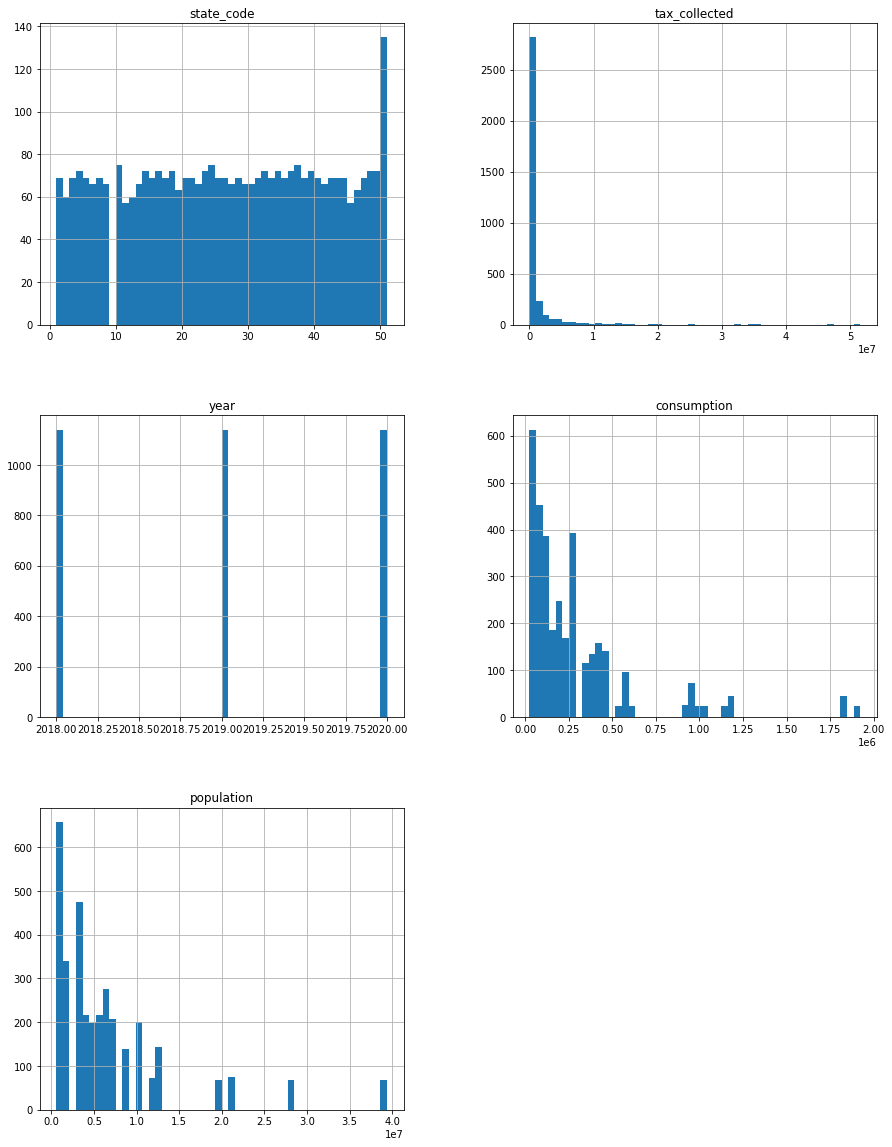

In [112]:
data_clean.hist(bins=50, figsize=(15, 20));
None

### _Decriptive Statistics_

**Let's check descriptive statistics for each numerical variable.**

In [113]:
data_clean.columns

Index(['region', 'state_code', 'tax_name', 'tax_code', 'tax_collected', 'year',
       'consumption', 'include?', 'population'],
      dtype='object')

- **_tax_collected_**

count    4.227000e+03
mean     2.112125e+06
std      7.670679e+06
min      0.000000e+00
25%      1.879600e+04
50%      1.462270e+05
75%      9.968480e+05
max      1.556919e+08
Name: tax_collected, dtype: float64


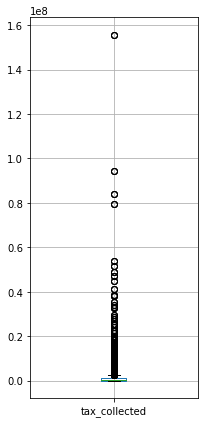

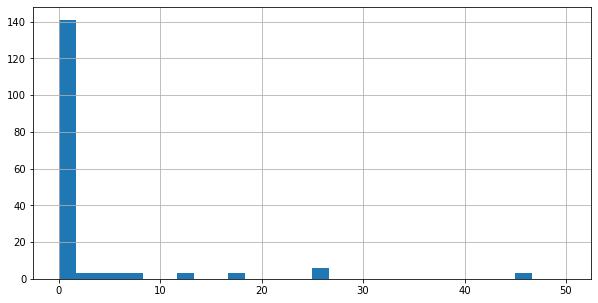

In [114]:
data['tax_collected'].describe()

import matplotlib.pyplot as plt

# descriptive statistics
print(data['tax_collected'].describe())
data.boxplot(column='tax_collected', figsize=(3,7));
plt.show()
data['tax_collected'].hist(bins=30, range=(0, 50), figsize=(10, 5));

### Conclusion

- mean differs from median (50%), meaning there are some anomalies or outliers in the dataset;
- standard deviation is 4 times bigger than the mean, meaning the range is too large and the data is left-handed (positively) scattered.

- **_consumption_**

count    4.227000e+03
mean     2.833720e+05
std      3.332602e+05
min      2.435200e+04
25%      7.427600e+04
50%      1.783750e+05
75%      3.647300e+05
max      1.921463e+06
Name: consumption, dtype: float64


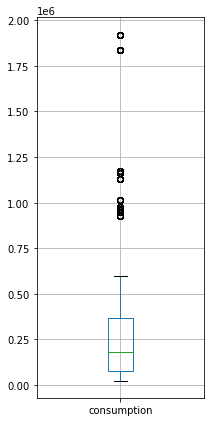

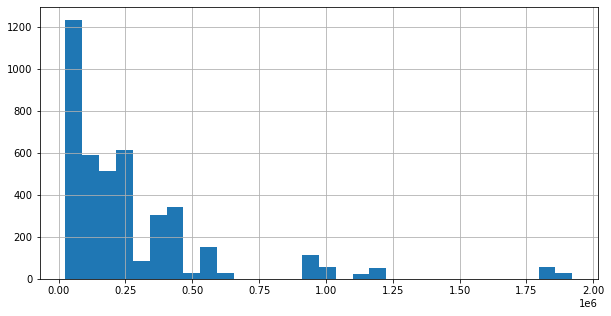

In [115]:
data['consumption'].describe()

import matplotlib.pyplot as plt

# descriptive statistics
print(data['consumption'].describe())
data.boxplot(column='consumption', figsize=(3,7));
plt.show()
data['consumption'].hist(bins=30, figsize=(10, 5));

### Conclusion:
- mean is quite close to median (50%), meaning there are no so many outliers in the dataset.

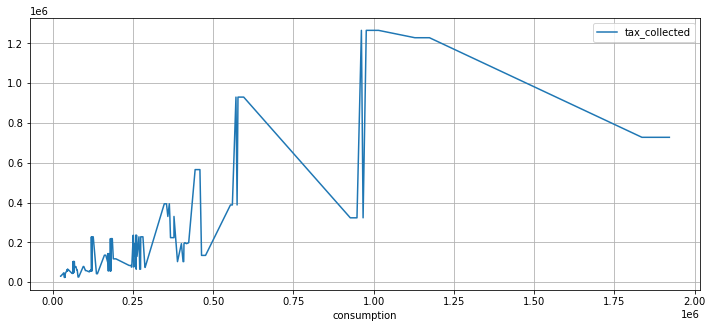

In [118]:
(
    data_clean
    .pivot_table(index='consumption', values='tax_collected', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

### 3.1 Determine state which has the highest amount of taxes per person.

Calculate in a separate column with tax per persone values in each state.

In [121]:
data_clean['tax_per_person'] = data_clean['tax_collected'] / data_clean['population']
data_clean['tax_per_person']

0       1.621753
1       1.621753
2       1.621753
3       1.079999
4       1.079999
          ...   
3415    0.066379
3416    0.066379
3417    0.000000
3418    0.000000
3419    0.000000
Name: tax_per_person, Length: 3420, dtype: float64

Group the data based on 'state' and mean value of the calculated tax per person amount.

In [126]:
tax_per_person = data_clean.groupby('region')['tax_per_person'].agg(['mean']).sort_values(by='mean', ascending=False).head(10)
tax_per_person.reset_index(inplace=True) # resetting indexed from 0 again

tax_per_person

,region,mean
0,North Dakota,0.382194
1,Hawaii,0.370807
2,Nevada,0.286548
3,Washington,0.271148
4,Wyoming,0.251399
5,Vermont,0.241748
6,Connecticut,0.223660
7,Minnesota,0.213378
8,South Dakota,0.201281
9,Maryland,0.187856


In [127]:
print(tax_per_person[tax_per_person['mean'] == tax_per_person['mean'].max()])

         region      mean
0  North Dakota  0.382194


In [128]:
data_clean_grouped = data_clean.groupby('region')[['tax_collected', 'consumption', 'tax_per_person']].agg('median').sort_values(by='consumption', ascending=False)
data_clean_grouped = data_clean_grouped.dropna()
display(data_clean_grouped)

,tax_collected,consumption,tax_per_person
region,,,
California,728045.0,1835981.0,0.018479
Texas,1228641.0,1164466.0,0.043380
New York,1265699.0,976857.0,0.064607
Florida,323393.0,947906.0,0.015417
Pennsylvania,930210.0,577036.0,0.072727
Illinois,388038.5,559565.0,0.030348
Ohio,134505.0,466160.0,0.011532
New Jersey,565736.0,446078.0,0.063648
Michigan,198226.5,411916.0,0.019869


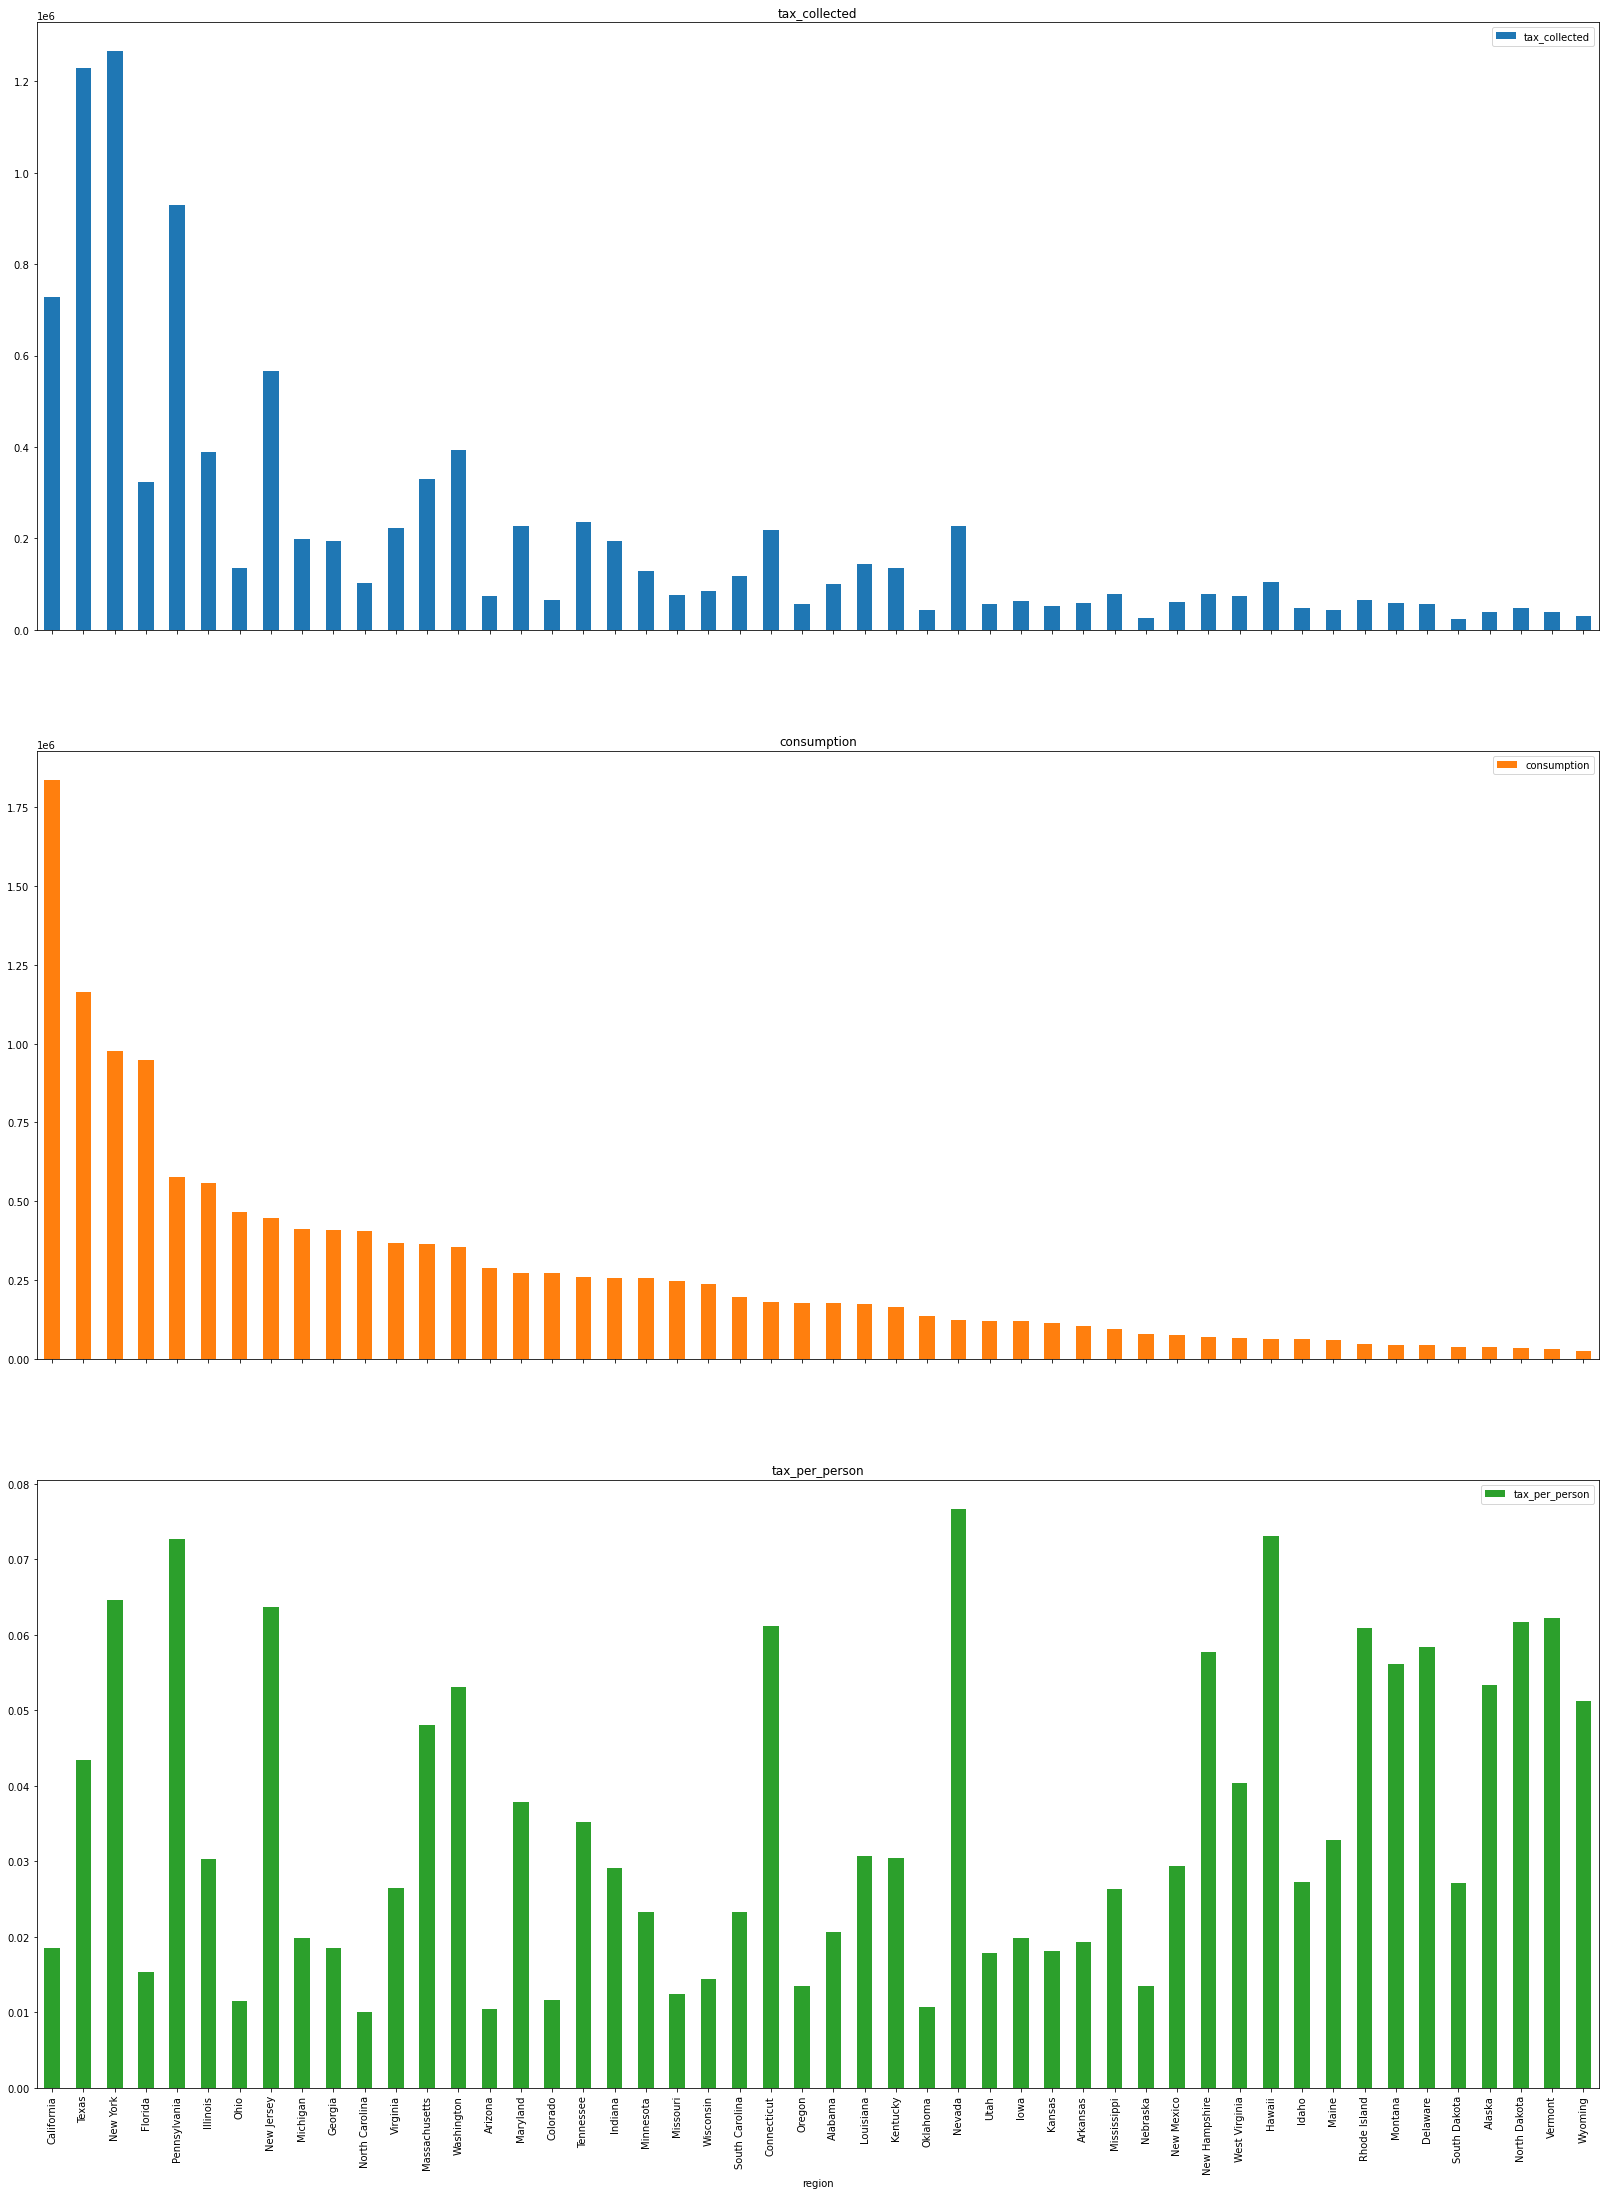

In [129]:
data_clean_grouped.plot.bar(subplots=True, figsize=(28, 38));

### Conclusion:
-  the highest tax per person is 0.38 mln $ in **North Dakota**.

### 3.2 Determine state with the third largest amount of collected taxes.

In [130]:
data_clean.dtypes

region             object
state_code        float64
tax_name           object
tax_code           object
tax_collected       int64
year              float64
consumption         int64
include?           object
population          int64
tax_per_person    float64
dtype: object

In [131]:
tax_collected = data_clean.groupby('region')['tax_collected'].agg(['mean']).sort_values(by='mean', ascending=False).head(10)
tax_collected.reset_index(inplace=True) # resetting indexed from 0 again
tax_collected

,region,mean
0,California,5.716945e+06
1,Texas,5.282273e+06
2,Florida,3.456232e+06
3,New York,3.184523e+06
4,Pennsylvania,2.397347e+06
5,Illinois,2.098533e+06
6,Washington,2.013389e+06
7,Ohio,1.993273e+06
8,New Jersey,1.669232e+06
9,Michigan,1.505789e+06


### Conclusion
-  the state with 3rd largest amount of taxes is **Florida**.

### 3.3 Name region with the smallest value of sum of "Individual Income Taxes" and "Income Taxes"

In [132]:
data_clean.columns

Index(['region', 'state_code', 'tax_name', 'tax_code', 'tax_collected', 'year',
       'consumption', 'include?', 'population', 'tax_per_person'],
      dtype='object')

- **Individual Income Taxes**

Filter the dataset only for **Individual Income Taxes**.

In [133]:
ind_income_tax = data_clean[data_clean['tax_name'] == 'Individual Income Taxes']
ind_income_tax

,region,state_code,tax_name,tax_code,tax_collected,year,consumption,include?,population,tax_per_person


In [134]:
ind_income_tax_grouped = ind_income_tax.groupby('region')['tax_collected'].agg(['sum']).sort_values(by='sum', ascending=False).tail(10)
ind_income_tax_grouped.reset_index(inplace=True) # resetting indexed from 0 again
ind_income_tax_grouped

,region,sum


### Conclusion
-  there are no individual income taxes sliced as 'included?' - 'no'.

_To be noticed: in the given task it is required to use only 'included?' = 'no' slice of data through all tasks._

- **Income Taxes**

Filter the dataset only for **Income Taxes**.

In [135]:
income_tax = data_clean[data_clean['tax_name'] == 'Income Taxes']
income_tax

,region,state_code,tax_name,tax_code,tax_collected,year,consumption,include?,population,tax_per_person


In [136]:
income_tax_grouped = income_tax.groupby('region')['tax_collected'].agg(['sum']).sort_values(by='sum', ascending=False).tail(10)
income_tax_grouped.reset_index(inplace=True) # resetting indexed from 0 again
income_tax_grouped

,region,sum


### Conclusion
-  there are no income taxes sliced as 'included?' - 'no'.

_To be noticed: in the given task it is required to use only 'included?' = 'no' slice of data through all tasks._

### 3.4 Calculate percent changes of personal consumption expenditures between 2018 and 2020 for each state and determine state and year with highest change (example: Florida 2018/2019)

In [137]:
data_clean['cons_per_person'] = data_clean['consumption'] / data_clean['population']
data_clean

,region,state_code,tax_name,tax_code,tax_collected,year,consumption,include?,population,tax_per_person,cons_per_person
0,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2018.0,60086,no,1335063,1.621753,0.045006
1,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2019.0,62130,no,1335063,1.621753,0.046537
2,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2020.0,61124,no,1335063,1.621753,0.045784
3,Maine,20.0,General Sales and Gross Receipts Taxes,T09,1441867,2018.0,60086,no,1335063,1.079999,0.045006
4,Maine,20.0,General Sales and Gross Receipts Taxes,T09,1441867,2019.0,62130,no,1335063,1.079999,0.046537
...,...,...,...,...,...,...,...,...,...,...,...
3415,Hawaii,12.0,Documentarty and Stock Transfer Taxes,T51,94537,2019.0,66977,no,1424203,0.066379,0.047028
3416,Hawaii,12.0,Documentarty and Stock Transfer Taxes,T51,94537,2020.0,63427,no,1424203,0.066379,0.044535
3417,Hawaii,12.0,Taxes NEC,T99,0,2018.0,64439,no,1424203,0.000000,0.045246
3418,Hawaii,12.0,Taxes NEC,T99,0,2019.0,66977,no,1424203,0.000000,0.047028


Group data per two columns _'region', 'year'_.

In [138]:
cons_per_person_grouped = data_clean.groupby(['region', 'year'], as_index = False)['cons_per_person'].agg(['mean']).sort_values(by='mean', ascending=False)
cons_per_person_grouped

,,mean
region,year,
Massachusetts,2019.0,0.055015
New Hampshire,2019.0,0.053365
Massachusetts,2018.0,0.053142
New Hampshire,2020.0,0.052393
Massachusetts,2020.0,0.052231
...,...,...
Oklahoma,2018.0,0.034578
Arkansas,2018.0,0.033875
Mississippi,2019.0,0.032289


Calculate the consumption percentage change between years.

In [139]:
cons_change = cons_per_person_grouped.pct_change().sort_values('mean')
cons_change

,,mean
region,year,
Mississippi,2019.0,-4.681604e-02
New Hampshire,2019.0,-3.000255e-02
Arkansas,2018.0,-2.032751e-02
New Hampshire,2020.0,-1.409429e-02
Mississippi,2018.0,-1.266693e-02
...,...,...
Ohio,2019.0,-1.332836e-04
Missouri,2019.0,-9.337199e-05
North Dakota,2020.0,-2.457400e-05


Indexes were destroyed after manupulation.

In [140]:
cons_change.index

MultiIndex([(  'Mississippi', 2019.0),
            ('New Hampshire', 2019.0),
            (     'Arkansas', 2018.0),
            ('New Hampshire', 2020.0),
            (  'Mississippi', 2018.0),
            (  'Connecticut', 2020.0),
            (        'Idaho', 2018.0),
            (     'Illinois', 2018.0),
            (     'Colorado', 2020.0),
            (     'Kentucky', 2020.0),
            ...
            (   'New Jersey', 2020.0),
            (    'Tennessee', 2019.0),
            (         'Utah', 2018.0),
            (   'California', 2018.0),
            (         'Iowa', 2020.0),
            (         'Ohio', 2019.0),
            (     'Missouri', 2019.0),
            ( 'North Dakota', 2020.0),
            (    'Minnesota', 2020.0),
            ('Massachusetts', 2019.0)],
           names=['region', 'year'], length=150)

Reset indexes in the grouped data.

In [141]:
cons_change.reset_index(inplace=True)

In [142]:
cons_change.columns # check indexes now

Index(['region', 'year', 'mean'], dtype='object')

Create a new variable for maximun mean value in each year (2018, 2019, 2020).

In [143]:
change2018 = cons_change[cons_change['year'] == 2018]['mean'].max()

In [144]:
change2019 = cons_change[cons_change['year'] == 2019]['mean'].max()

In [145]:
change2020 = cons_change[cons_change['year'] == 2020]['mean'].max()

Get a result of the changes in each year.

In [146]:
result_change = cons_change[cons_change['mean'].isin([change2018, change2019, change2020])]
result_change

,region,year,mean
143,California,2018.0,-1.884551e-04
146,Missouri,2019.0,-9.337199e-05
148,Minnesota,2020.0,-5.135175e-07


### Conclusion:
- In 2018 the highest change in consumption was in **California**.
- In 2019 the hughest change in consumption was in **Missouri**.
- In 2020 the highest change in consumption was in **Minnesota**.

All the changes a negative, meaning people consume less each year.

### 3.5 Determine Region with the highest average Personal Consumption Expenditures per person in 2020

In [147]:
data_clean['cons_per_person'] = data_clean['consumption'] / data_clean['population']
data_clean['cons_per_person']

0       0.045006
1       0.046537
2       0.045784
3       0.045006
4       0.046537
          ...   
3415    0.047028
3416    0.044535
3417    0.045246
3418    0.047028
3419    0.044535
Name: cons_per_person, Length: 3420, dtype: float64

In [148]:
consumption2020 = data_clean[data_clean['year'] == 2020]
consumption2020

,region,state_code,tax_name,tax_code,tax_collected,year,consumption,include?,population,tax_per_person,cons_per_person
2,Maine,20.0,Sales and Gross Receipts Taxes,TA1,2165142,2020.0,61124,no,1335063,1.621753,0.045784
5,Maine,20.0,General Sales and Gross Receipts Taxes,T09,1441867,2020.0,61124,no,1335063,1.079999,0.045784
8,Maine,20.0,Selective Sales and Gross Receipts Taxes,TA2,723275,2020.0,61124,no,1335063,0.541753,0.045784
11,Maine,20.0,Alcoholic Beverages Sales Tax,T10,19266,2020.0,61124,no,1335063,0.014431,0.045784
14,Maine,20.0,Amusements Sales Tax,T11,54400,2020.0,61124,no,1335063,0.040747,0.045784
...,...,...,...,...,...,...,...,...,...,...,...
3407,Hawaii,12.0,Other License Taxes,T29,12647,2020.0,63427,no,1424203,0.008880,0.044535
3410,Hawaii,12.0,Other Taxes,TA5,113505,2020.0,63427,no,1424203,0.079697,0.044535
3413,Hawaii,12.0,Death and Gift Taxes,T50,18968,2020.0,63427,no,1424203,0.013318,0.044535
3416,Hawaii,12.0,Documentarty and Stock Transfer Taxes,T51,94537,2020.0,63427,no,1424203,0.066379,0.044535


In [149]:
consumption = consumption2020.groupby('region')['consumption'].agg(['mean']).sort_values(by='mean', ascending=False).head(10)
consumption.reset_index(inplace=True) # resetting indexed from 0 again

consumption

,region,mean
0,California,1835981.0
1,Texas,1164466.0
2,New York,961707.0
3,Florida,947906.0
4,Pennsylvania,570772.0
5,Illinois,553612.0
6,Ohio,466160.0
7,New Jersey,446078.0
8,Michigan,411364.0
9,Georgia,408753.0


### Conclusion
-  **California** is the highest average Personal Consumption Expenditures per person in 2020 (1835981$).

## 4. Data Visualization _(Tableau dashboarding)_

In [150]:
# writing to xlsx dataset for visualization
tax_data = data_clean.to_excel('/Users/yuliabezginova/PycharmProjects/income_tax/tax_data.xlsx')

Tableau workbook: https://dub01.online.tableau.com/#/site/yuliabezginova/workbooks/948545?:origin=card_share_link

### 4.1 Amount of taxes collected per person in each state

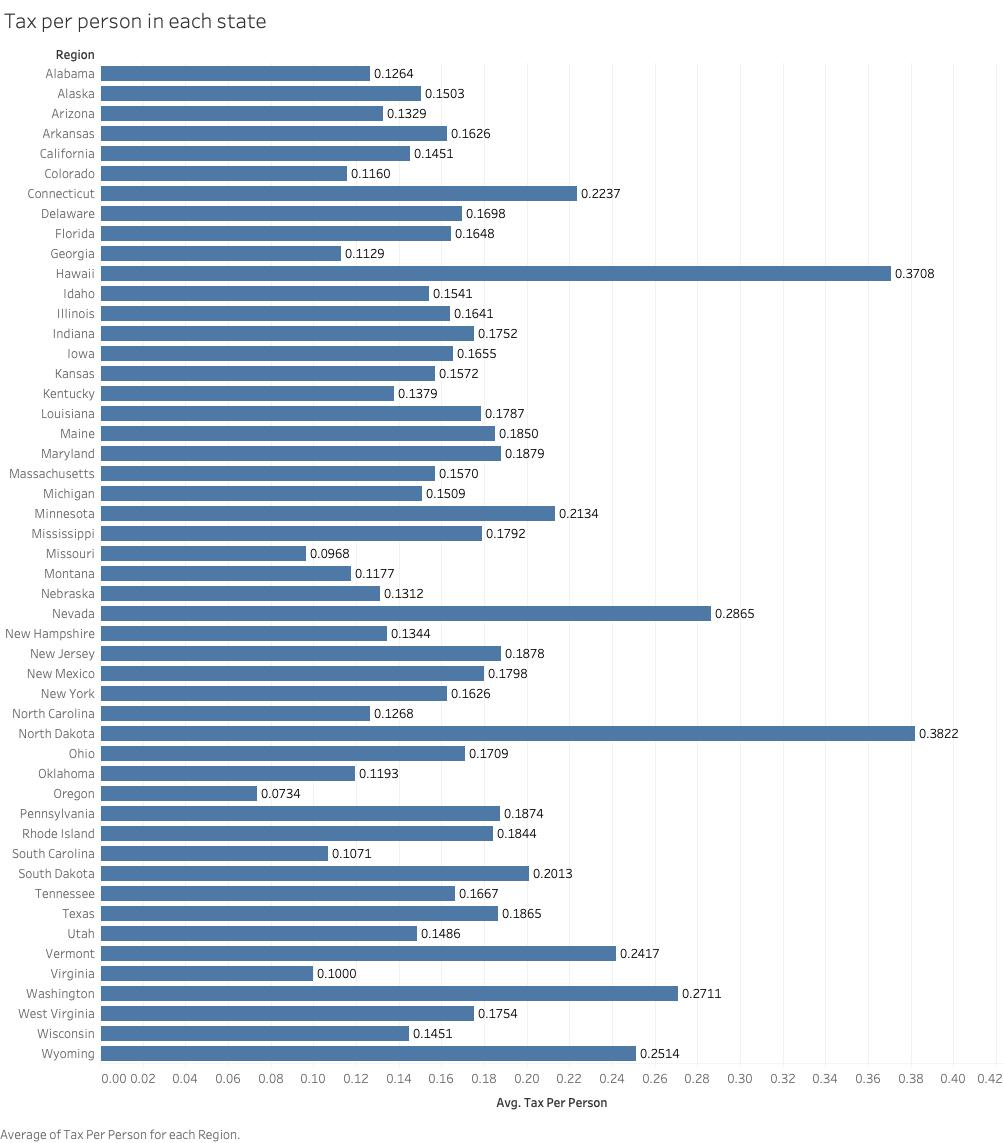

### 4.2 Amount of taxes collected in each state

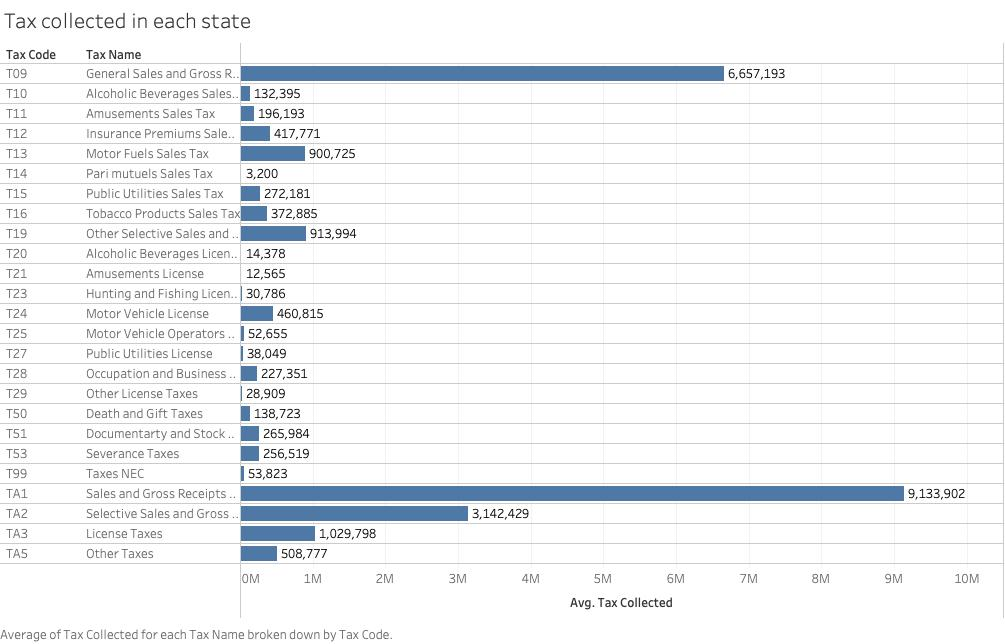

### 4.3 Breakdown of collected taxes (tax types)

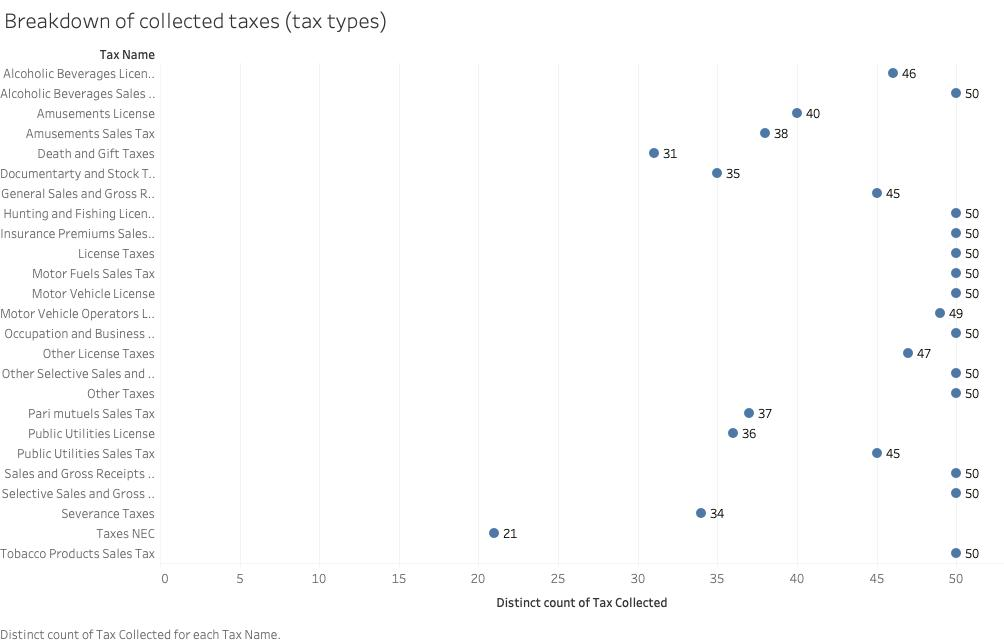

### 4.4 How value of personal consumption expenditures has changed in time.

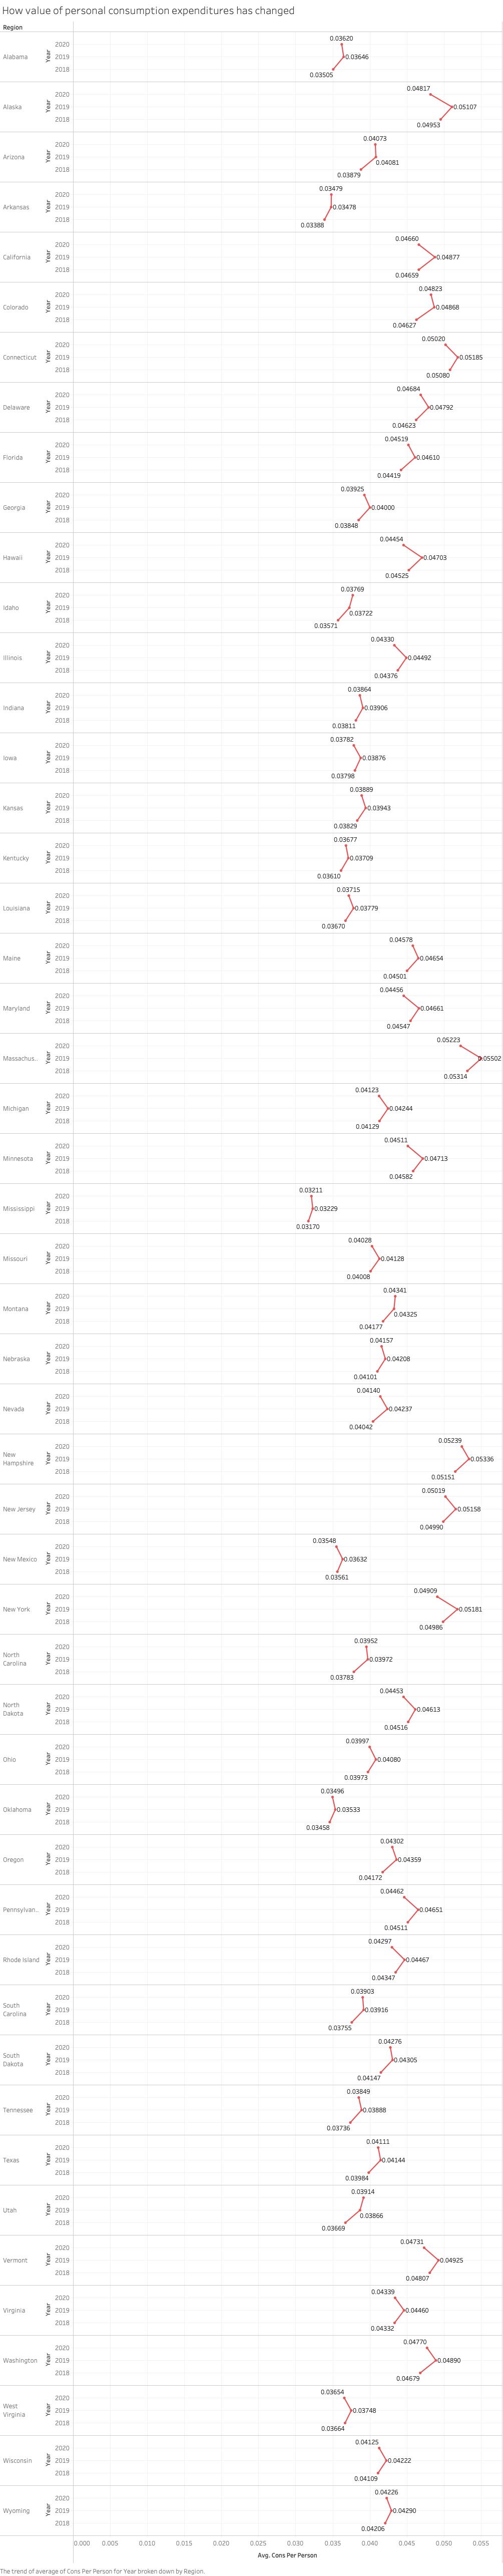

### 4.5 Ranking of regions based on average value of personal consumption expenditures per person.

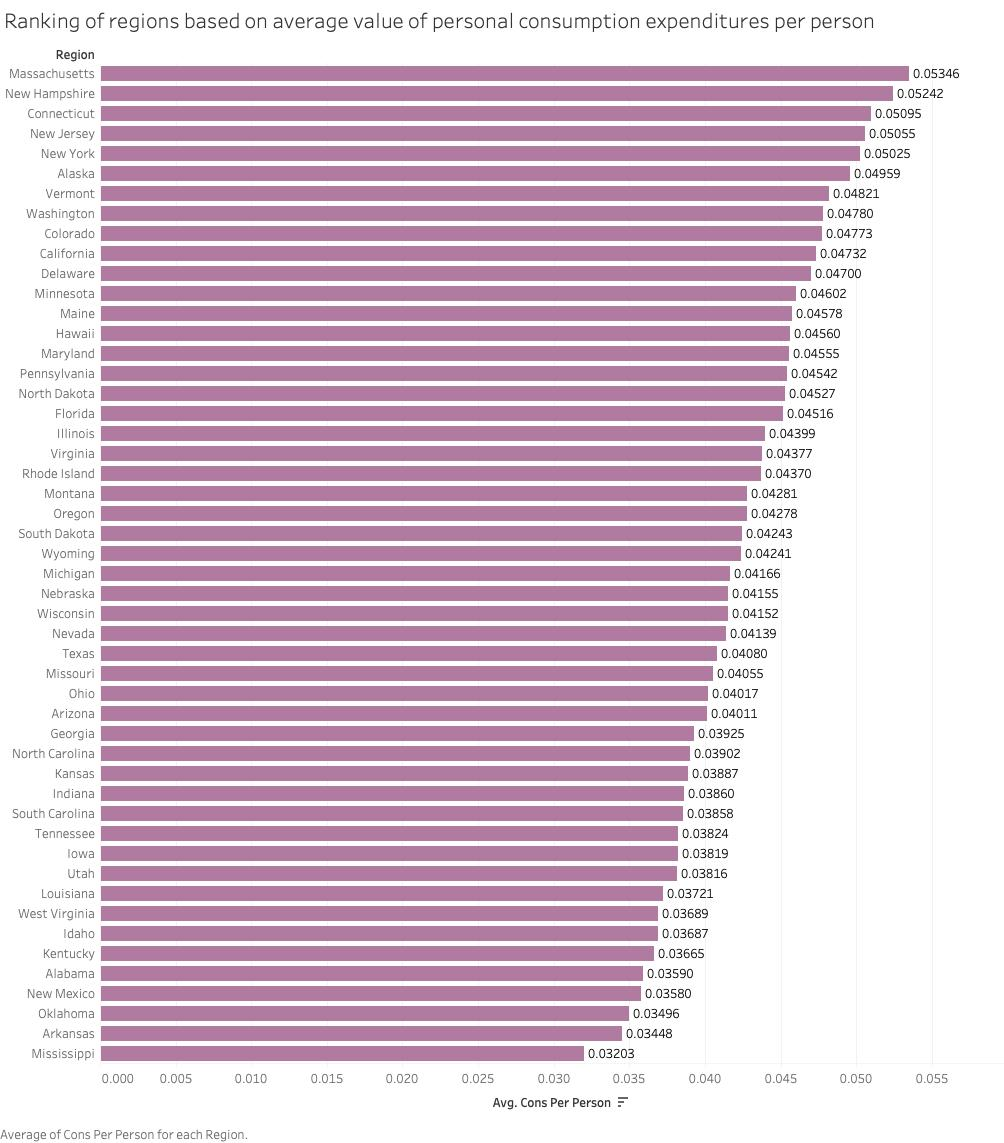

### Tools used for this project:
- Python (Jupyter, pandas, matpplotlib)
- Tableau dashboards

_Thank you for going through this project. Your feedback and comments are very welcome to_ **_ybezginova2021@gmail.com_**

_Thank you!_

_Best wishes,_

_Yulia_